<a href="https://colab.research.google.com/github/Wayne401-afk/ECG-CNN/blob/main/CNN_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒

Para modificar el código y hacerlo un autoencoder en el sentido estricto, el objetivo debe ser que la red neuronal reconstruya la señal de entrada. El autoencoder clásico tiene la siguiente estructura:

1. Codificador: Comprime la entrada en un espacio latente.
2. Espacio latente: Representación comprimida de la entrada.
3. Decodificador: Reconstruye la entrada original a partir del espacio latente.

El siguiente código tiene los cambios necesarios para que sea un autoencoder en el sentido estricto:

1. Codificamos la señal para que se comprima en un espacio de menor dimensión (espacio latente).
2. Reconstruimos la señal original en lugar de predecir los coeficientes
𝛼
α.
**Aquí está el código modificado:**

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6894 - val_loss: 2.3859
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9112 - val_loss: 1.4263
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0468 - val_loss: 0.7139
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5242 - val_loss: 0.3729
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2746 - val_loss: 0.2205
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1578 - val_loss: 0.1556
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1158 - val_loss: 0.1273
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0935 - val_loss: 0.1134
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0888 - val_loss: 0.1006
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0768 - val_loss: 0.0864
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 - val_loss: 0.0698
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 - val_l

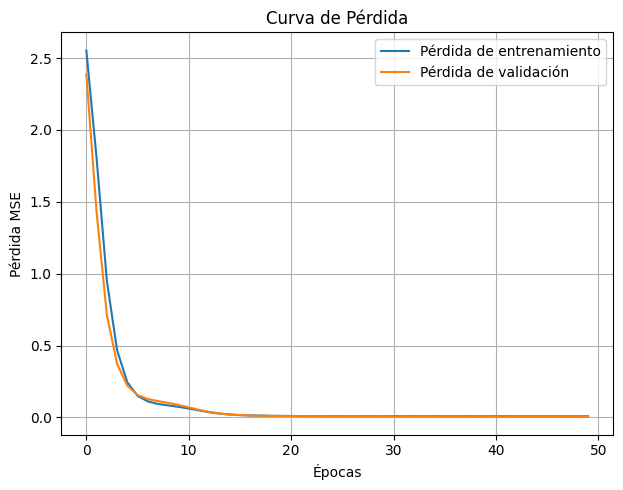

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Error Cuadrático Medio (MSE): 0.0073718759224305494
Correlación promedio entre señales originales y reconstruidas: 0.9977860083873484


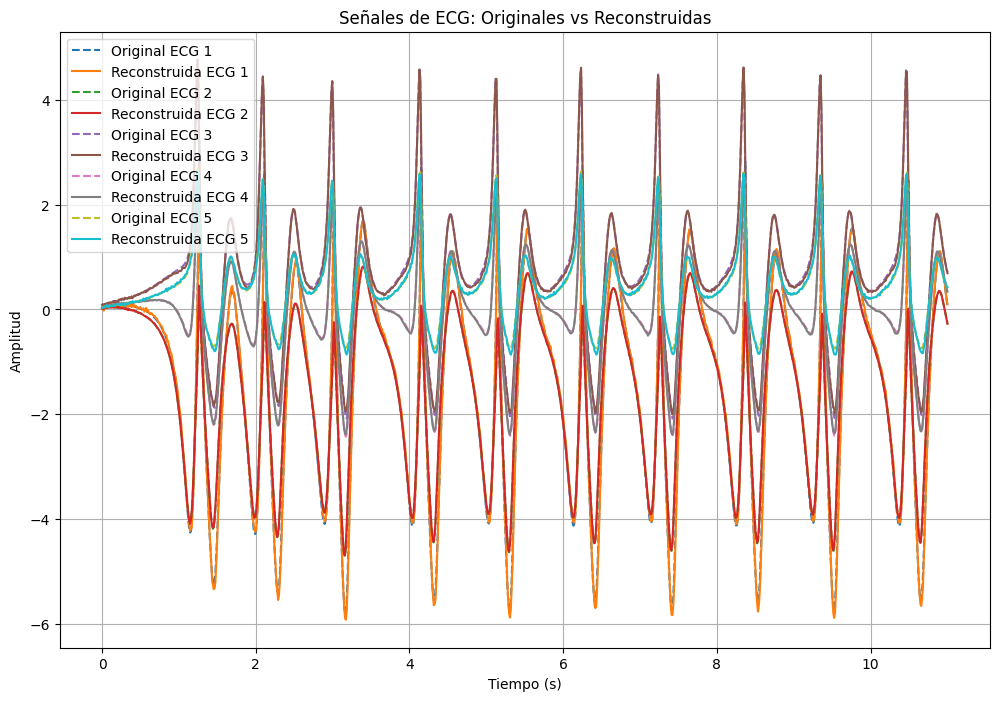

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1180: 

Precisión: 0.0
Recall: 0.0
F1 Score: 0.0
Precisión Global: 1.0


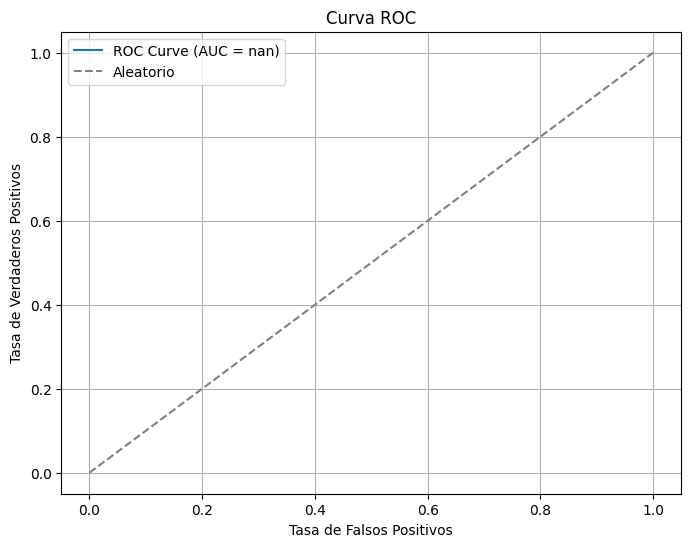

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, mean_squared_error
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import pearsonr

# ----- Sistema dinámico -----
Gamma = 5
H = 3
t_span = (0, 11)  # Intervalo de tiempo
t_eval = np.linspace(*t_span, 1000)  # Puntos de evaluación

# Sistema de ecuaciones diferenciales
def sistema_ecuaciones(t, vars, Gamma, H):
    x, y, z, w = vars
    dxdt = Gamma * (x - y - 1.35 * x * y - x * y**2)
    dydt = Gamma * (H * x - 3 * y + 1.35 * x * y + x * y**2 + 4 * (w - y))
    dzdt = Gamma * (z - w - 1.35 * z * w - z * w**2)
    dwdt = Gamma * (H * z - 3 * w + 1.35 * z * w + z * w**2 + 2 * 4 * (y - w))
    return [dxdt, dydt, dzdt, dwdt]

# Generar señales para entrenamiento
num_samples = 500
alphas_train = np.random.rand(num_samples, 4)  # Coeficientes alphas
signals_train = []

for alpha in alphas_train:
    sol = solve_ivp(sistema_ecuaciones, t_span, [0, 0, 0.1, 0], args=(Gamma, H), t_eval=t_eval)
    x, y, z, w = sol.y
    ecg_signal = alpha[0] * x + alpha[1] * y + alpha[2] * z + alpha[3] * w  # Señal de ECG
    signals_train.append(ecg_signal)

signals_train = np.array(signals_train)

# ----- Autoencoder -----
input_dim = signals_train.shape[1]  # Número de puntos en la señal
encoding_dim = 16  # Dimensión comprimida del espacio latente

# Capa de entrada
input_signal = tf.keras.Input(shape=(input_dim,))

# Codificador (comprimiendo la entrada)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_signal)

# Espacio latente
latent_space = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

# Decodificador (reconstruir la señal original)
decoded = tf.keras.layers.Dense(input_dim, activation='linear')(latent_space)

# Modelo autoencoder
autoencoder = tf.keras.Model(input_signal, decoded)

# Compilamos el modelo con la función de pérdida MSE (Error Cuadrático Medio)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenamos el autoencoder
history = autoencoder.fit(signals_train, signals_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Graficamos la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida MSE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# ----- Evaluación -----
# Reconstruir todas las señales de entrenamiento
reconstructed_signals = autoencoder.predict(signals_train)

# 1. Calcular el MSE (Error cuadrático medio) entre las señales originales y las reconstruidas
mse = mean_squared_error(signals_train.flatten(), reconstructed_signals.flatten())
print(f"Error Cuadrático Medio (MSE): {mse}")

# 2. Calcular la Correlación de Pearson entre las señales originales y las reconstruidas
pearson_corr = np.mean([pearsonr(signals_train[i], reconstructed_signals[i])[0] for i in range(len(signals_train))])
print(f"Correlación promedio entre señales originales y reconstruidas: {pearson_corr}")

# 3. Graficar algunas señales originales vs reconstruidas
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(t_eval, signals_train[i], label=f'Original ECG {i+1}', linestyle='--')
    plt.plot(t_eval, reconstructed_signals[i], label=f'Reconstruida ECG {i+1}')
    plt.legend()
plt.title('Señales de ECG: Originales vs Reconstruidas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# 4. Métricas de clasificación (precisión, recall, F1 score) - como una referencia, comparamos las señales reconstruidas con un umbral
# Consideramos un valor binario de "buena reconstrucción" si el MSE está por debajo de cierto umbral.
threshold = 0.5  # Este umbral puede ajustarse según el contexto
binary_true = np.array([1 if np.sum(signal**2) < threshold else 0 for signal in signals_train])
binary_pred = np.array([1 if np.sum(reconstructed_signal**2) < threshold else 0 for reconstructed_signal in reconstructed_signals])

# Calcular métricas de clasificación
precision = precision_score(binary_true, binary_pred)
recall = recall_score(binary_true, binary_pred)
f1 = f1_score(binary_true, binary_pred)
accuracy = accuracy_score(binary_true, binary_pred)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Precisión Global: {accuracy}")

# 5. Curva ROC y AUC (si se considera clasificación binaria de "buena" o "mala" reconstrucción)
fpr, tpr, _ = roc_curve(binary_true, np.sum(reconstructed_signals, axis=1))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()



**Cambios realizados:**
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
1. Codificador y decodificador: He modificado la arquitectura para que el modelo reconstruya la señal de entrada. El codificador ahora toma la señal de entrada y la mapea a un espacio latente de dimensión encoding_dim, mientras que el decodificador reconstruye la señal original de tamaño input_dim a partir de este espacio latente comprimido.

2. Compilación: El modelo ahora se entrena con la pérdida de Error Cuadrático Medio (MSE) entre las señales originales y las reconstruidas.

3. Entrenamiento: El entrenamiento ahora es sobre las mismas señales de entrada (signals_train) para que el modelo aprenda a reconstruir las señales en lugar de predecir los coeficientes
𝛼
α.

**Salidas:**
Curvas de entrenamiento: Se graficarán las pérdidas de entrenamiento y validación.
Reconstrucción: Se graficará la comparación entre una señal original y su reconstrucción después de pasar por el autoencoder.